In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Win 용
matplotlib.rcParams['font.size'] = 15 #글자
matplotlib.rcParams['axes.unicode_minus'] = False

In [82]:
df = pd.read_csv('drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [83]:
# 토탈 서빙 컬럼 추가
# 대륙별 토탈 원 그래프로 출력
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [84]:
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

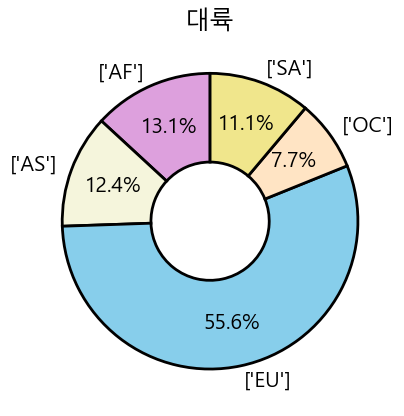

In [85]:
values = list(df.groupby('continent')['total_servings'].sum())
labels = list(df.groupby('continent')['continent'].unique())
colors = ['plum','beige','skyblue','bisque','khaki','peachpuff']
wedgeprops = {'width':0.6,'edgecolor':'black','linewidth':2}

plt.title('대륙')
plt.pie(values,labels=labels,colors=colors, startangle=90,wedgeprops=wedgeprops, pctdistance=0.7, autopct="%.1f%%",)
plt.show()

In [86]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [87]:
# 전체 평균보다 많은 알코올 도수를 섭취하는 대륙을 출력하시오.

# 1. 전체 평균 도수 구하기
data = df['total_litres_of_pure_alcohol'].mean()
# 2. 대륙별 도수 평균 구하기
total_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 3. 필터 구하기
filt = total_df > data
total_df[filt]
# 4. 필터 적용해서 출력


continent
EU    8.617778
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [88]:
# beer_servings이 가장 높은 대륙
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1).index

Index(['EU'], dtype='object', name='continent')

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

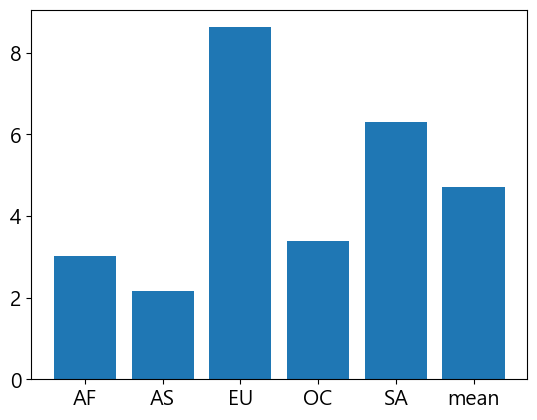

In [89]:
## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력하시오.
## 마지막에는 평균 막대그래프를 출력하시오.
# 1. 전체 total_litres_of_pure_alcohol 평균을 구하기
data = df['total_litres_of_pure_alcohol'].mean()
n_data = [data]*6
# 2. 대륙별 total_litres_of_pure_alcohol 평균을 구하기
# 'AF', 'AS', 'EU', 'OC', 'OT', 'SA'
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con_df
# 3. 컬럼에 대륙별 평균을 추가하기 mean
con_df['mean'] = data
# 4. 막대그래프를 출력
con_bar = plt.bar(con_df.index,con_df)
plt.plot(con_df.index,[data]*7,ls="--",color='black')
plt.grid(axis='y',ls='--',alpha=0.5)  # 격자선
# con_bar[len(con_df)-1].set_color('red')
con_bar[len(con_df)-1].set_color('red')